Description: This program predicts if a passenger will survive on the Titanic

In [1]:
# Check which Python interpreter this notebook is using
import sys
print(sys.executable)

C:\Users\phili\anaconda3\envs\datascience\python.exe


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Set the theme
sns.set_style("whitegrid")
sns.set(font="Product Sans")

# Load the data
titanic = sns.load_dataset('titanic')

# Print the first 10 rows of the data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
# Count the number of rows and columns in the data set
titanic.shape

(891, 15)

In [5]:
# Get some statistics
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Get a count ot the number of survivors
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

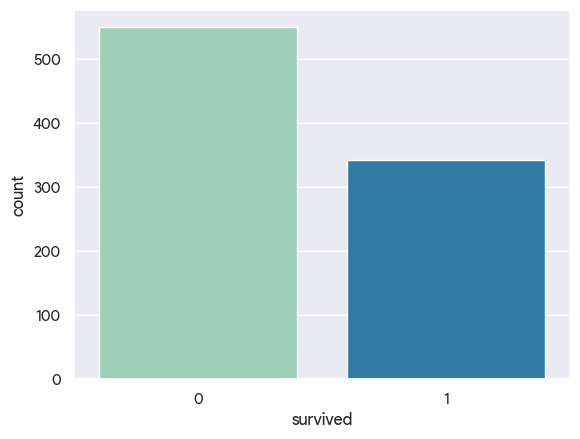

In [7]:
# Visualize the count of survivors
sns.countplot(x=titanic['survived'], palette='YlGnBu')

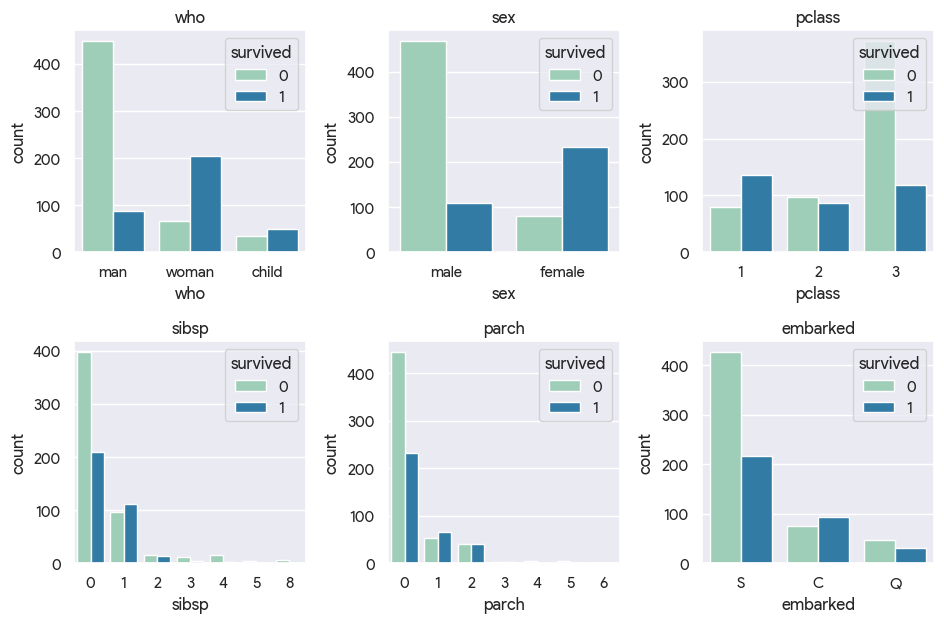

In [8]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked'

# Define the columns for which the count of survivors will be visualized
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

# Define the number of rows and columns for the grid of subplots
n_rows = 2
n_cols = 3

# Create a 2x3 grid of subplots with a specified figure size
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3.2, n_rows * 3.2))

# Loop through each row in the grid of subplots
for r in range(0, n_rows):
    # Loop through each column in the grid of subplots
    for c in range(0, n_cols):
        
        # Calculate the index for the current subplot based on row and column
        i = r * n_cols + c
        # Access the current subplot in the 2D array axs
        ax = axs[r][c]
        # Create a countplot for the current column with 'survived' as the hue
        sns.countplot(x=cols[i], hue='survived', data=titanic, ax=ax, palette='YlGnBu')
        # Set the title for the current subplot using the column name
        ax.set_title(cols[i])
        # Add a legend for the 'survived' hue to the current subplot
        ax.legend(title='survived', loc='upper right')
        
# Adjust the layout oddf the subplots to prevent overlapping and ensure proper spacing
plt.tight_layout()

In [9]:
# Look at survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [10]:
# Look at survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<Axes: xlabel='sex'>

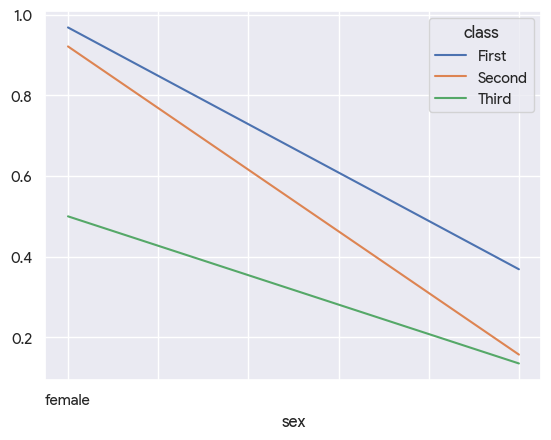

In [11]:
# Look at survival rate by sex and class visually
titanic.pivot_table('survived', index='sex', columns='class').plot()

<Axes: xlabel='class', ylabel='survived'>

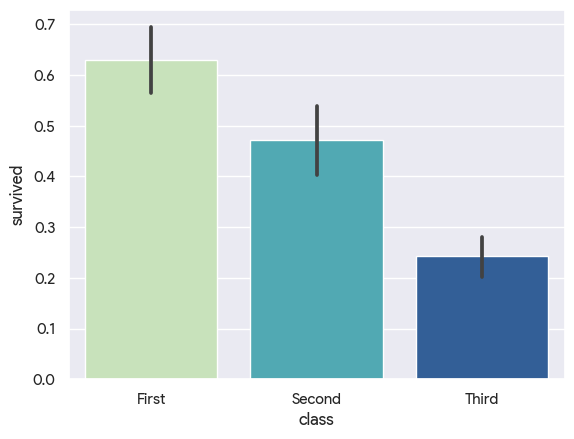

In [12]:
# Plot the survival rate of each class
sns.barplot(x='class', y='survived', data=titanic, palette='YlGnBu')

In [13]:
# Look at survival rate by sex, age and class
age = pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

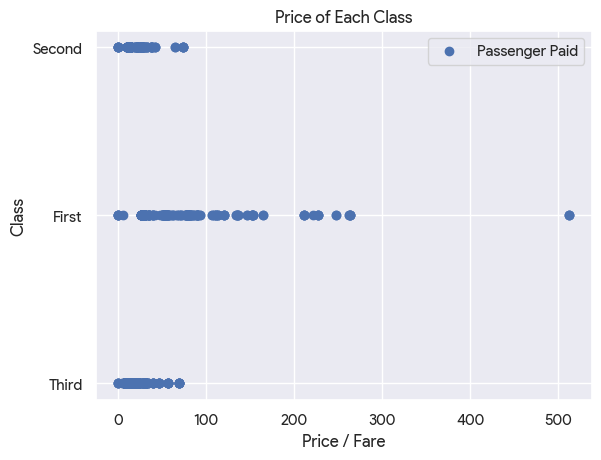

In [14]:
# Plot the prices paid of each class
plt.scatter(titanic['fare'], titanic['class'], label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [15]:
# Count the empty values in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
# Look at all ot the values in each column & get a count
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [17]:
# Drop the columns
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis=1)

# Remove the rows with missing values
titanic = titanic.dropna( subset = ['embarked', 'age'])

In [18]:
# Count the new number of rows and columns in the data set
titanic.shape

(712, 8)

In [19]:
# Look at the data types
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [20]:
# Print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encode the sex column
titanic[titanic.columns[2]] = labelencoder.fit_transform(titanic.iloc[:, 2].values)

# Encode the embarked column
titanic[titanic.columns[7]] = labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [22]:
# Print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [23]:
# Look at the data types
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [24]:
# Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

In [25]:
# Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [26]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
# Create a function with many machine learning models
def models(X_train, Y_train):
    
    # Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    # Use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    
    # Use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

    # Use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    # Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    # Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    # Use the RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    # Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[1]K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [28]:
# Get and train all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.7978910369068541
[1]K Neighbors Training Accuracy:  0.8664323374340949
[2]SVC Linear Training Accuracy:  0.7768014059753954
[3]SVC RBF Training Accuracy:  0.8506151142355008
[4]Gaussian NB Training Accuracy:  0.8031634446397188
[5]Decision Tree Training Accuracy:  0.9929701230228472
[6]Random Forest Training Accuracy:  0.9753954305799648


In [ ]:
# Show the confusion matrix and accuracy for all ot the models on the test data
from sklearn.metrics import confusion_matrix

